# Cardiovascular Disease (Heart disease) Prediction

Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease; heart rhythm problems (arrhythmias); and heart defects you're born with (congenital heart defects), among others.

The term "heart disease" is often used interchangeably with the term "cardiovascular disease." Cardiovascular disease generally refers to conditions that involve narrowed or blocked blood vessels that can lead to a heart attack, chest pain (angina) or stroke. Other heart conditions, such as those that affect your heart's muscle, valves or rhythm, also are considered forms of heart disease.

<img src=https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2014/09/22/12/43/mcdc7_theheart.jpg, width="300" height="300">

More refrence:
https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118

# Objective of this notebook 

To show how Machine Learning and Deep Learning methods can be used on tabular data to build models that predicts the disease.

For Machine Learning Random Forest was used to build model
For Deep Learning TensorFlow Keras was used to build model

# Data description
There are 3 types of input features:

1. Objective: factual information;
2. Examination: results of medical examination;
3. Subjective: information given by the patient.


**Features:**

|Feature Name | Objective Feature | Column Name | Data Type|
|------|------|------|------|
|Age | Objective Feature | age | int (days)|
|Height | Objective Feature | height | int (cm) |
|Weight | Objective Feature | weight | float (kg) |
|Gender | Objective Feature | gender | categorical code |
|Systolic blood pressure | Examination Feature | ap_hi | int |
|Diastolic blood pressure | Examination Feature | ap_lo | int |
|Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
|Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
|Smoking | Subjective Feature | smoke | binary |
|Alcohol intake | Subjective Feature | alco | binary |
|Physical activity | Subjective Feature | active | binary |
|Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
| | | | |


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
sns.set_style("dark")

In [2]:
df=pd.read_csv('./data/cardio_train.csv',delimiter=';')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.drop('id',inplace=True,axis=1)

In [5]:
df.age=df.age/356

In [6]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
age            70000 non-null float64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


In [8]:
#!pip install pandas-profiling

In [9]:
import pandas_profiling as pp

## Profile report

In [10]:
%%time

#pp.ProfileReport(df)

Wall time: 0 ns


 - Average age (years) is 54.6 and it spans between 30 and 66.6
 - Only two gender but there is more data of females than males
 - Average height (cm) is ~164cm and max height is 250cm. There is a very short person's data with 55cm height or input error, definitely not a baby since the minimum age is ~30.
 - Average weight (kg) is ~74.2 but the minimum is 10, probably the shortest person's weight. we may need to remove this outlier. Maximum is 200kg.
 - Average ap_hi (Systolic blood pressure) is ~128.8 with very low minimum of -150 and very high maximum of 16020. Definitely there are outliers to be removed. Range of Systolic blood pressure is usually between 90 and 250.
 - Average ap_lo (Diastolic blood pressure) is ~96.6 with very low minimum of -70 and very high maximum of 11000. Definitely there are outliers to be removed. Diastolic blood pressure usually ranges between 60 and 140.
 - cholesterol data has more normal cholesterol records that other two categories.
 - Like cholesterol same goes to gluc data too.
 - smoke more non smokers records than smokers.
 - alco numner of less frequent alcohol consumer data is higher than frequent consumers.
 - active more active people data than less active.
 - cardio target data is almost balanced.


## Finding and removing the outliers

### height

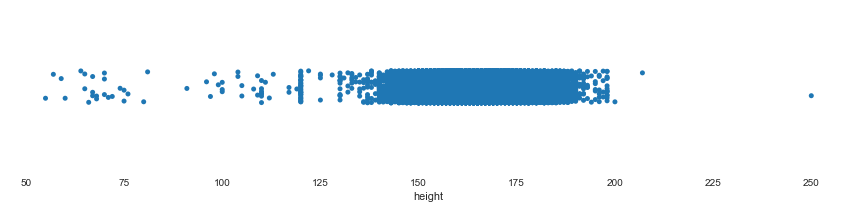

In [11]:
sns.catplot(x='height',data=df,height=3, aspect=4,)
plt.show()

In [12]:
len(df[df.height <80])

22

In [13]:
len(df[df.height >225])

1

There are a few patients are shorter than 60cm and one patient above 225cm. Lets remove them from the data.

In [14]:
df.drop(df[df.height <80].index, inplace=True)
df.drop(df[df.height >225].index, inplace=True)

### weight

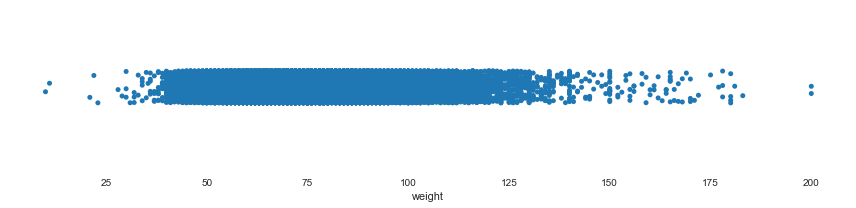

In [15]:
sns.catplot(x='weight',data=df,height=3, aspect=4,)
plt.show()

In [16]:
len(df[df.weight <25])

5

In [17]:
len(df[df.weight >190])

2

Lets remove the data for the patients whom weigh less than 25kg and more than 190kg

In [18]:
df.drop(df[df.weight <25].index, inplace=True)
df.drop(df[df.weight >190].index, inplace=True)

### ap_hi

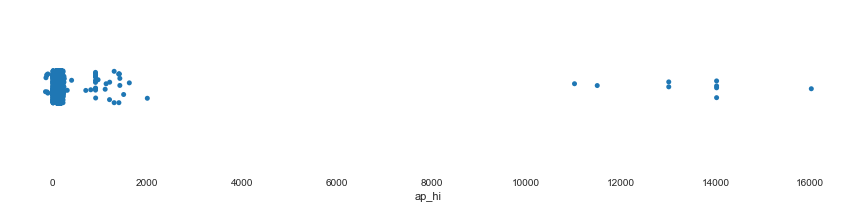

In [19]:
sns.catplot(x='ap_hi',data=df,height=3, aspect=4,)
plt.show()

In [20]:
len(df[df.ap_hi <80])

206

In [21]:
len(df[df.ap_hi >260])

40

Lets remove the data for the patients whom has the reading less than 80 and higher than 250 with some tolerance added.

In [22]:
df.drop(df[df.ap_hi <80].index, inplace=True)
df.drop(df[df.ap_hi >250].index, inplace=True)

### ap_lo

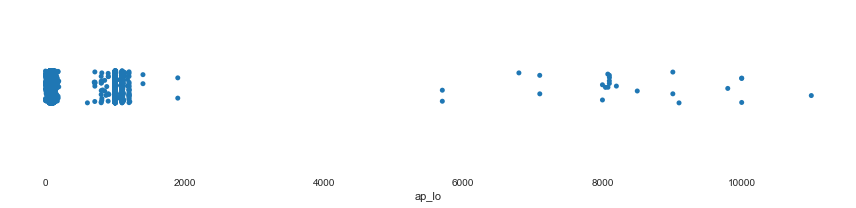

In [23]:
sns.catplot(x='ap_lo',data=df,height=3, aspect=4,)
plt.show()

In [24]:
len(df[df.ap_lo <50])

62

In [25]:
len(df[df.ap_lo >150])

968

Lets remove the data for the patients whom has the reading less than 50 and higher than 150 with some tolerance added.

In [26]:
df.drop(df[df.ap_lo <50].index, inplace=True)
df.drop(df[df.ap_lo >150].index, inplace=True)

### Incorrect blood pressure reading
diastolic pressure must be lower than systolic otherwise its incorrect reading

In [27]:
len(df[df['ap_lo']> df['ap_hi']])

74

Lets remove the incorrect readings

In [28]:
df.drop(df[df['ap_lo']> df['ap_hi']].index, inplace=True)

In [29]:
df.shape

(68620, 12)

## EDA

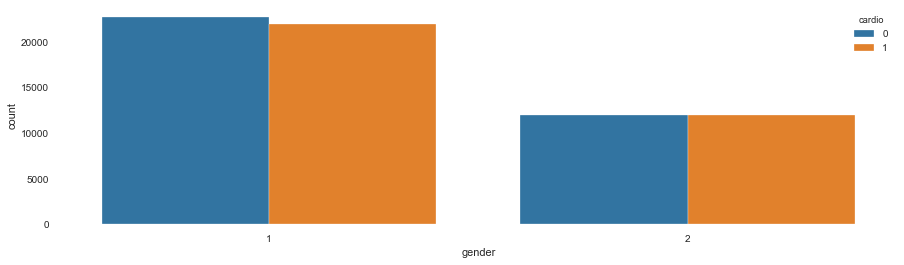

In [30]:
plt.figure(figsize=(15,4))
sns.countplot(x='gender',data=df,hue='cardio');

Number of patients with the disease and no disease is balanced in each gender.

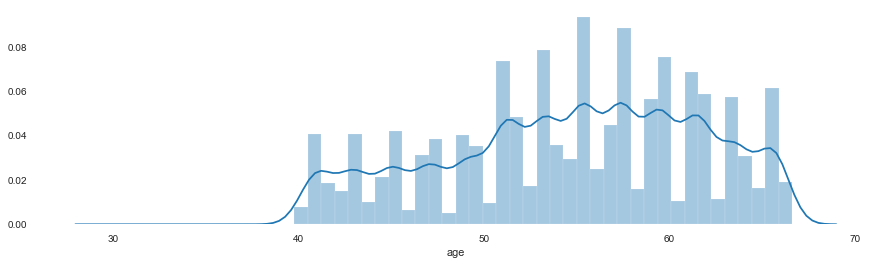

In [31]:
plt.figure(figsize=(15,4))
sns.distplot(df.age);

Number of patients below 40 is very low and the heighest at 55. 

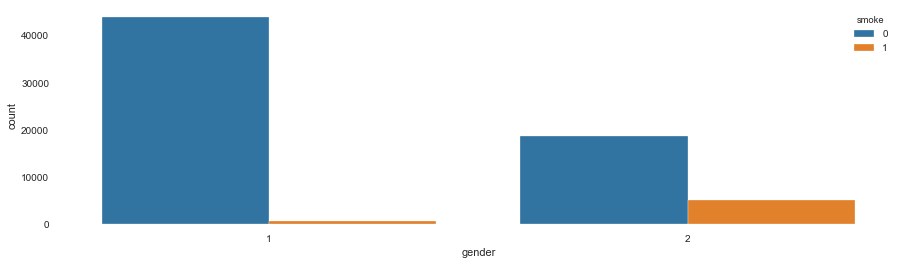

In [32]:
plt.figure(figsize=(15,4))
sns.countplot(x='gender',data=df,hue='smoke');

Males smokers are more than females

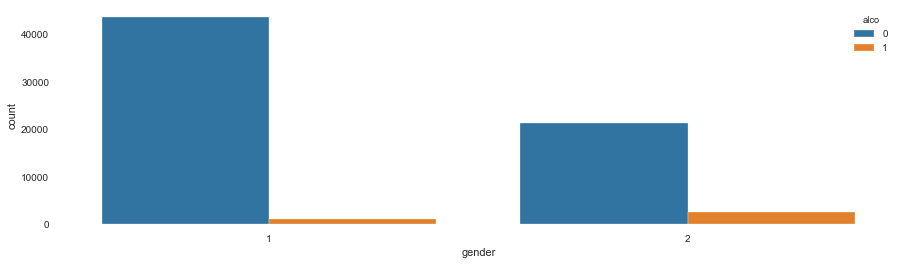

In [33]:
plt.figure(figsize=(15,4))
sns.countplot(x='gender',data=df,hue='alco');

Males consume alcohol frequently than females

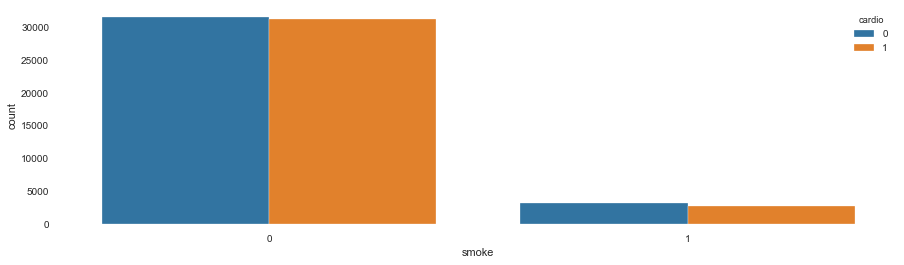

In [34]:
plt.figure(figsize=(15,4))
sns.countplot(x='smoke',data=df,hue='cardio');

Disease and no disease numbers are balanced in smoke data

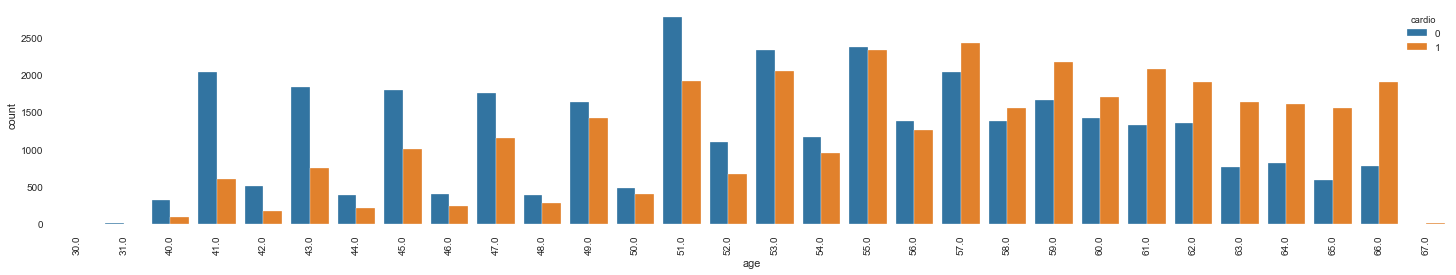

In [35]:
tempdf=df
tempdf=tempdf.round({"age":0})
plt.figure(figsize=(25,4))
chart=sns.countplot(x='age',data=tempdf,hue='cardio')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

More patients reported with the disease at the age of 55 and continue to outpace no disease numbers as age progress.

## Machine Learning for Prediction

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, linear_model
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


In [37]:
cols=df.columns
cols

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [75]:
X=df[cols[:-1]]
y=df[[cols[-1]]]

In [39]:
print(X.shape)
print(y.shape)

(68620, 11)
(68620, 1)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(48034, 11)
(48034, 1)
(20586, 11)
(20586, 1)


In [62]:
%%time
# Random Forest Classifier training and grid search
#parameter range to be searched for best parameters
params={'model__n_estimators': [100, 150, 200,250,300,350,400,450,500],
       'model__max_depth': [None, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
pipeline = Pipeline([('scaler', StandardScaler()),('model',RandomForestClassifier())])
grid = GridSearchCV(pipeline, cv=5, n_jobs=-1, param_grid=params)
grid.fit(X_train, y_train) #fit to GridSearchCV 
best_param=grid.best_estimator_.get_params()
print(best_param)
with open ('rfc_model.plk','wb') as f:
        pickle.dump(grid.best_estimator_,f)
predict=grid.predict(X_test)


C:\Users\Thelee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Thelee\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Thelee\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


{'memory': None, 'steps': [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))], 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=

C:\Users\Thelee\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


              precision    recall  f1-score   support

           0       0.72      0.79      0.75     10402
           1       0.76      0.68      0.72     10184

   micro avg       0.74      0.74      0.74     20586
   macro avg       0.74      0.73      0.73     20586
weighted avg       0.74      0.74      0.73     20586



C:\Users\Thelee\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Thelee\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.7572136403380938
0.7351598173515982
Wall time: 42min 31s


C:\Users\Thelee\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


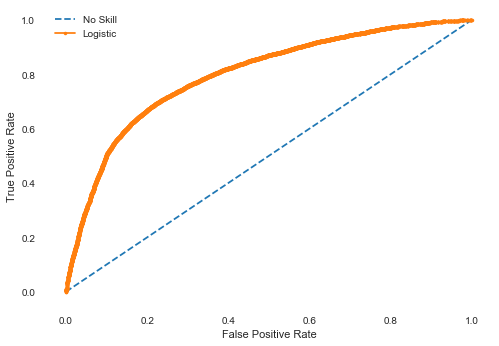

              precision    recall  f1-score   support

           0       0.72      0.79      0.75     10402
           1       0.76      0.68      0.72     10184

   micro avg       0.74      0.74      0.74     20586
   macro avg       0.74      0.73      0.73     20586
weighted avg       0.74      0.74      0.73     20586



C:\Users\Thelee\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\Thelee\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.7572136403380938
0.7351598173515982


In [86]:
# Compute ROC curve and ROC area for each class
y_score = grid.predict_proba(X_test)
#roc(y_score, y_test)
y_score = y_score[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
rfc_auc = roc_auc_score(y_test, y_score)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, y_score)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
cr=classification_report(y_test,predict)
print(cr)
score_train=grid.score(X_train, y_train)
score_test=grid.score(X_test, y_test)
print(score_train)
print(score_test)

**Machine Learning accuracy to predict the disease is around 75%**

## Deep Learning for Prediction


In [43]:
import tensorflow as tf
from tensorflow import feature_column as feature_column
from tensorflow.keras import layers

C:\Users\Thelee\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Thelee\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Thelee\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Thelee\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68620 entries, 0 to 69999
Data columns (total 12 columns):
age            68620 non-null float64
gender         68620 non-null int64
height         68620 non-null int64
weight         68620 non-null float64
ap_hi          68620 non-null int64
ap_lo          68620 non-null int64
cholesterol    68620 non-null int64
gluc           68620 non-null int64
smoke          68620 non-null int64
alco           68620 non-null int64
active         68620 non-null int64
cardio         68620 non-null int64
dtypes: float64(2), int64(10)
memory usage: 9.3 MB


In [45]:
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68620 entries, 0 to 68619
Data columns (total 12 columns):
age            68620 non-null float64
gender         68620 non-null int64
height         68620 non-null int64
weight         68620 non-null float64
ap_hi          68620 non-null int64
ap_lo          68620 non-null int64
cholesterol    68620 non-null int64
gluc           68620 non-null int64
smoke          68620 non-null int64
alco           68620 non-null int64
active         68620 non-null int64
cardio         68620 non-null int64
dtypes: float64(2), int64(10)
memory usage: 6.3 MB


In [46]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('cardio')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

In [47]:
train, test = train_test_split(df, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

43916 train examples
10980 validation examples
13724 test examples


In [49]:
age = feature_column.numeric_column("age")
height = feature_column.numeric_column("height")
weight = feature_column.numeric_column("weight")
ap_hi = feature_column.numeric_column("ap_hi")
ap_lo = feature_column.numeric_column("ap_lo")
gender = feature_column.categorical_column_with_vocabulary_list('gender', [1,2])
cholesterol = feature_column.categorical_column_with_vocabulary_list('cholesterol', [1,2,3])
gluc = feature_column.categorical_column_with_vocabulary_list('gluc', [1,2,3])
smoke = feature_column.categorical_column_with_vocabulary_list('smoke', [0, 1])
alco = feature_column.categorical_column_with_vocabulary_list('alco', [0, 1])
active = feature_column.categorical_column_with_vocabulary_list('active', [0, 1])

In [52]:
col_list=df.columns
age_buc=list(range(30,71))
feature_columns = []
for header in col_list[:-1]:
    feature_columns.append(feature_column.numeric_column(header))

age_buckets = feature_column.bucketized_column(age, boundaries=age_buc)
feature_columns.append(age_buckets)

In [53]:
feature_columns

[NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='gender', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='height', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='weight', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='ap_hi', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='ap_lo', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='cholesterol', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='gluc', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='smoke', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='alco', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 Nume

In [54]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [59]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [92]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


### Train the model with validation 
history = model.fit(train_ds,
          validation_data=val_ds,
          epochs=200)

Epoch 1/200
1373/1373 [==============================] - 6s 4ms/step - loss: 0.6581 - acc: 0.6622 - val_loss: 0.6405 - val_acc: 0.6350
Epoch 2/200
1373/1373 [==============================] - 6s 4ms/step - loss: 0.6013 - acc: 0.6832 - val_loss: 0.6470 - val_acc: 0.7011
Epoch 3/200
1373/1373 [==============================] - 7s 5ms/step - loss: 0.5846 - acc: 0.6912 - val_loss: 0.5693 - val_acc: 0.7185
Epoch 4/200
1373/1373 [==============================] - 8s 6ms/step - loss: 0.5728 - acc: 0.7024 - val_loss: 0.5658 - val_acc: 0.7083
Epoch 5/200
1373/1373 [==============================] - 8s 6ms/step - loss: 0.5690 - acc: 0.7043 - val_loss: 0.5631 - val_acc: 0.7017
Epoch 6/200
1373/1373 [==============================] - 7s 5ms/step - loss: 0.5684 - acc: 0.7048 - val_loss: 0.6015 - val_acc: 0.7144
Epoch 7/200
1373/1373 [==============================] - 7s 5ms/step - loss: 0.5657 - acc: 0.7059 - val_loss: 0.5638 - val_acc: 0.7189
Epoch 8/200
1373/1373 [==============================] 

1373/1373 [==============================] - 8s 6ms/step - loss: 0.5506 - acc: 0.7171 - val_loss: 0.5497 - val_acc: 0.7200
Epoch 62/200
1373/1373 [==============================] - 8s 6ms/step - loss: 0.5497 - acc: 0.7188 - val_loss: 0.5568 - val_acc: 0.7162
Epoch 63/200
1373/1373 [==============================] - 7s 5ms/step - loss: 0.5497 - acc: 0.7177 - val_loss: 0.5505 - val_acc: 0.7196
Epoch 64/200
1373/1373 [==============================] - 7s 5ms/step - loss: 0.5505 - acc: 0.7188 - val_loss: 0.5554 - val_acc: 0.7279
Epoch 65/200
1373/1373 [==============================] - 7s 5ms/step - loss: 0.5489 - acc: 0.7196 - val_loss: 0.5495 - val_acc: 0.7230
Epoch 66/200
1373/1373 [==============================] - 7s 5ms/step - loss: 0.5499 - acc: 0.7176 - val_loss: 0.5557 - val_acc: 0.7124
Epoch 67/200
1373/1373 [==============================] - 7s 5ms/step - loss: 0.5499 - acc: 0.7176 - val_loss: 0.5507 - val_acc: 0.7241
Epoch 68/200
1373/1373 [==============================] - 7s 

1373/1373 [==============================] - 7s 5ms/step - loss: 0.5471 - acc: 0.7198 - val_loss: 0.5682 - val_acc: 0.6899
Epoch 122/200
1373/1373 [==============================] - 7s 5ms/step - loss: 0.5474 - acc: 0.7202 - val_loss: 0.5510 - val_acc: 0.7239
Epoch 123/200
1373/1373 [==============================] - 8s 5ms/step - loss: 0.5469 - acc: 0.7193 - val_loss: 0.5511 - val_acc: 0.7215
Epoch 124/200
1373/1373 [==============================] - 7s 5ms/step - loss: 0.5477 - acc: 0.7193 - val_loss: 0.5496 - val_acc: 0.7188
Epoch 125/200
1373/1373 [==============================] - 7s 5ms/step - loss: 0.5472 - acc: 0.7192 - val_loss: 0.5493 - val_acc: 0.7151
Epoch 126/200
1373/1373 [==============================] - 7s 5ms/step - loss: 0.5474 - acc: 0.7192 - val_loss: 0.5509 - val_acc: 0.7169
Epoch 127/200
1373/1373 [==============================] - 7s 5ms/step - loss: 0.5470 - acc: 0.7188 - val_loss: 0.5496 - val_acc: 0.7132
Epoch 128/200
1373/1373 [==============================

Epoch 181/200
1373/1373 [==============================] - 7s 5ms/step - loss: 0.5457 - acc: 0.7203 - val_loss: 0.5511 - val_acc: 0.7257
Epoch 182/200
1373/1373 [==============================] - 7s 5ms/step - loss: 0.5461 - acc: 0.7190 - val_loss: 0.5512 - val_acc: 0.7169
Epoch 183/200
1373/1373 [==============================] - 8s 6ms/step - loss: 0.5455 - acc: 0.7182 - val_loss: 0.5489 - val_acc: 0.7198
Epoch 184/200
1373/1373 [==============================] - 7s 5ms/step - loss: 0.5460 - acc: 0.7191 - val_loss: 0.5502 - val_acc: 0.7138
Epoch 185/200
1373/1373 [==============================] - 7s 5ms/step - loss: 0.5451 - acc: 0.7199 - val_loss: 0.5513 - val_acc: 0.7195
Epoch 186/200
1373/1373 [==============================] - 7s 5ms/step - loss: 0.5456 - acc: 0.7195 - val_loss: 0.5483 - val_acc: 0.7180
Epoch 187/200
1373/1373 [==============================] - 7s 5ms/step - loss: 0.5456 - acc: 0.7193 - val_loss: 0.5482 - val_acc: 0.7198
Epoch 188/200
1373/1373 [================

**Deep Learning accuracy to predict the disease is around:**

In [93]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

429/429 [==============================] - 1s 3ms/step - loss: 0.5374 - acc: 0.7286
Accuracy 0.7285777


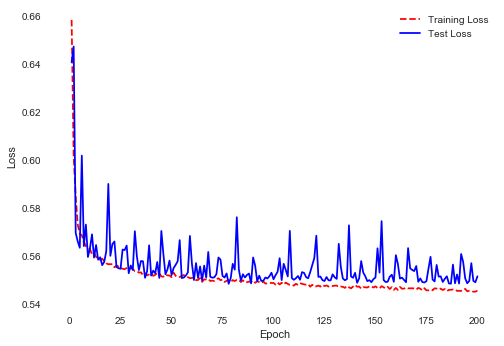

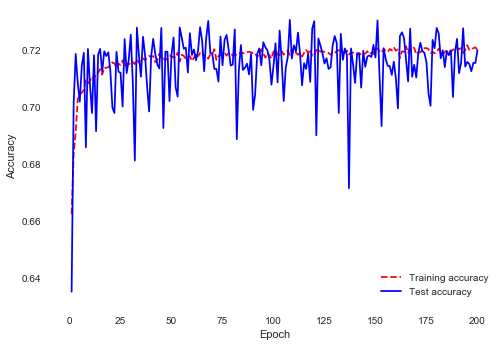

In [94]:
# Function to plot loss and accuracy curves
def plot_curves():
  # Get training and test loss histories
    training_loss = history.history['loss']
    test_loss = history.history['val_loss']
    training_acc = history.history['acc']
    test_acc = history.history['val_acc']
    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    # Visualize loss history
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show();
    # Visualize accuracy history
    plt.plot(epoch_count, training_acc, 'r--')
    plt.plot(epoch_count, test_acc, 'b-')
    plt.legend(['Training accuracy', 'Test accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show();

plot_curves()